<h2>Boosting example by Mark Mace<br><br>
A few introductory code snipets, mostly from:</h2>
<br>
https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb 
<br>
<h2>and</h2>
<br> 
https://github.com/ageron/handson-ml/blob/master/07_ensemble_learning_and_random_forests.ipynb
<br>
<h2>on boosting tree-based machine learning models</h2>

In [10]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# sklearn dataset for iris
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

<h2>Lets just look at some simple classification and regression problems <br>
We will start with sklearn's moon shaped classifier</h2>

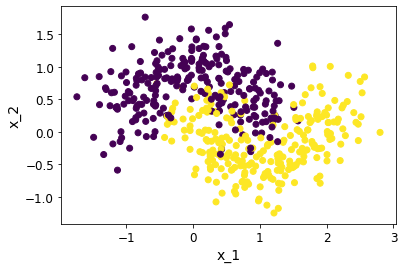

In [11]:
#EDA -- this is obviously a very simple problem
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
# perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# PLOT UTILITY
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


<h2>The most basic of trees </h2>

In [21]:
# the most basic tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

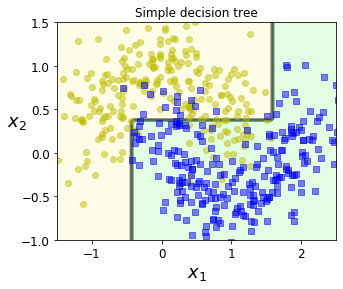

In [27]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('Simple decision tree')
plt.show()

<h2>AdaBoost</h2>

In [31]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf_001 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.01, random_state=42)
ada_clf_001.fit(X_train, y_train)

ada_clf_05 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_05.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

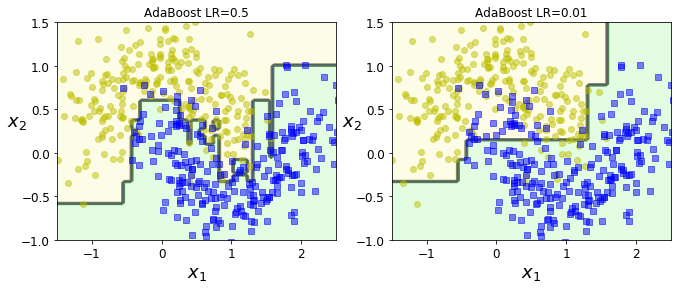

In [32]:
# compare two learning rates
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(ada_clf_05, X, y)
plt.title('AdaBoost LR=0.5')
plt.subplot(122)
plot_decision_boundary(ada_clf_001, X, y)
plt.title('AdaBoost LR=0.01')
plt.show()


<h2> Gradient boost decision tree </h2>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf_05 = GradientBoostingClassifier(max_depth=1, n_estimators=200, 
                                  learning_rate=0.5, random_state=42)
gb_clf_05.fit(X, y)
gb_clf_001 = GradientBoostingClassifier(max_depth=1, n_estimators=200, 
                                  learning_rate=0.05, random_state=42)
gb_clf_001.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

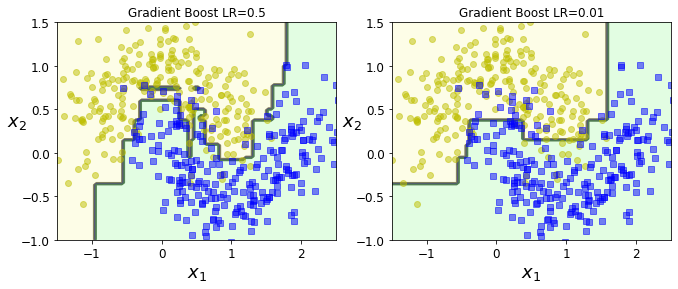

In [35]:
# compare two learning rates
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(gb_clf_05, X, y)
plt.title('Gradient Boost LR=0.5')
plt.subplot(122)
plot_decision_boundary(gb_clf_001, X, y)
plt.title('Gradient Boost LR=0.01')
plt.show()


<h2>Now let's just compare the accuracy of our classification with AdaBoost vs simple decision tree</h2>

In [36]:
from sklearn.metrics import accuracy_score

y_pred_tree_clf = tree_clf.predict(X_test)
print("tree_clf",accuracy_score(y_test, y_pred_tree_clf))


y_pred_ada_clf_001 = ada_clf_001.predict(X_test)
print("ada_clf_001",accuracy_score(y_test, y_pred_ada_clf_001))

y_pred_ada_clf_05 = ada_clf_05.predict(X_test)
print("ada_clf_05",accuracy_score(y_test, y_pred_ada_clf_05))


y_pred_gb_clf_001 = gb_clf_001.predict(X_test)
print("gb_clf_001",accuracy_score(y_test, y_pred_gb_clf_001))

y_pred_gb_clf_05 = gb_clf_05.predict(X_test)
print("gb_clf_05",accuracy_score(y_test, y_pred_gb_clf_05))


tree_clf 0.896
ada_clf_001 0.88
ada_clf_05 0.896
gb_clf_001 0.92
gb_clf_05 0.96
